In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import scipy.optimize as optimization
import scipy.optimize as least_squares
import tensorflow as tf

from BHDVCStf import BHDVCS #modified bhdvcs file
import utilities as uts #general utilities that are useful for all methods

In [2]:
bhdvcs = BHDVCS()
df = pd.read_csv("dvcs_xs_newsets_genCFFs.csv")
data = uts.DvcsData(df)

numSets = 15
numReplicas = 30

In [3]:
def produceResults(data, numSets, numReplicas):
    results =[]
    for i in tqdm(range(numSets)):
        replicas = []
        seti = data.getSet(i) # within uts, class DvcsData, grabbing function getSet(self,setNum, itemsInSet=36)
        X = np.array(seti.XnoCFF) #grabs 'phi_x', 'k', 'QQ', 'x_b', 't', 'F1', 'F2', 'dvcs'
        sigma = seti.erry #error in F
        pars = np.array([1,1,1])
        for i in range(numReplicas):
            y = seti.sampleY() #draws random sample from gaussian distr. inputs are f and error in F
            cff, cffcov = least_squares.curve_fit(bhdvcs.TotalUUXS, X, y, pars, sigma, method='lm')
            replicas.append(cff)
        results.append(replicas)
    return np.array(results)

In [4]:
results = produceResults(data, numSets, numReplicas)

In [17]:
y_yhat, err = uts.y_yhat_errCFFs(data, results, 0)

Mean percent error:  9.162997745833115
RMSE:  0.9464075322152056
RMSE w yhat=mean:  2.5254628436780107
R-squared:  0.8595653068625898


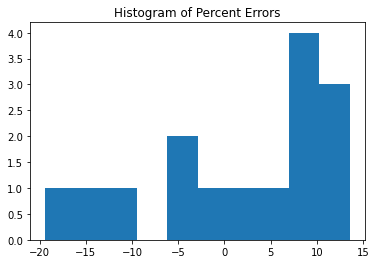

In [18]:
uts.evaluate(y_yhat)

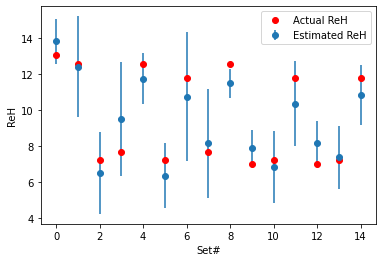

In [19]:
uts.plotError(y_yhat, err, "ReH")

Mean percent error:  9.646992867993738
RMSE:  5.212939128874105
RMSE w yhat=mean:  2.525480507907797
R-squared:  -3.2606637937852447


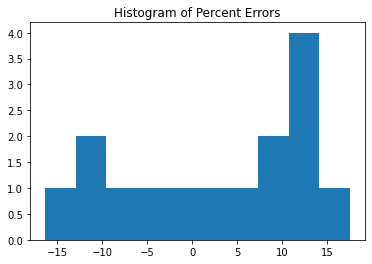

In [20]:
y_yhat, err = uts.y_yhat_errCFFs(data, results, 1)
uts.evaluate(y_yhat)

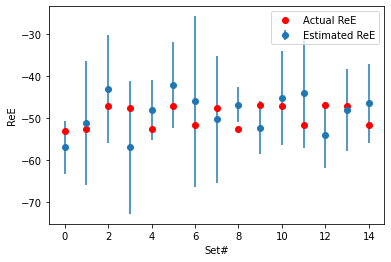

In [21]:
uts.plotError(y_yhat, err, "ReE")

Mean percent error:  8.692512001135984
RMSE:  0.45016269470589343
RMSE w yhat=mean:  1.4030345621243816
R-squared:  0.8970557095051804


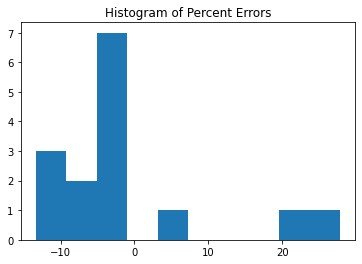

In [22]:
y_yhat, err = uts.y_yhat_errCFFs(data, results, 2)
uts.evaluate(y_yhat)

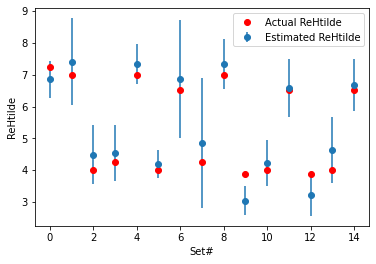

In [23]:
uts.plotError(y_yhat, err, "ReHtilde")

Mean percent error:  5.5973016917889735
RMSE:  0.0024710175235357107
RMSE w yhat=mean:  0.015855649879790133
R-squared:  0.9757124584829684


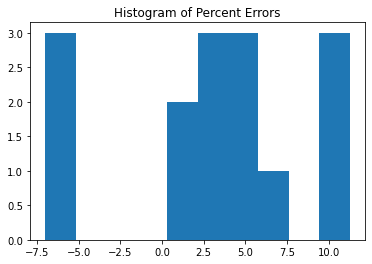

In [24]:
y_yhat, err = uts.y_yhat_errFs(results, data)
uts.evaluate(y_yhat)

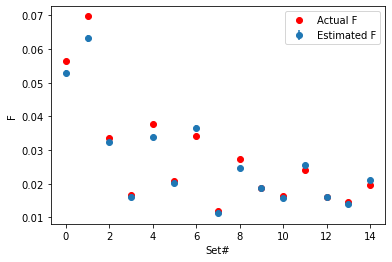

In [25]:
uts.plotError(y_yhat, err, "F")

In [26]:
results.tofile('replicas500[base].txt')